<a href="https://colab.research.google.com/github/Jungseunggi/Section4_week2/blob/main/Section4_week2_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. 순환 신경망(Recurrent Neural Network, RNN)**


*  RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징
* Sequential Data (연속형 데이터, 순서가 있는 데이터)를 처리하기 위해 나온 신경망

* 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**

## **3.1 순환 신경망 구조**

<img src="https://camo.githubusercontent.com/acb80537702750b3dd87225151c2b9ebed78d6aef5cab306d912541d016ba2dc/68747470733a2f2f7777772e656173792d74656e736f72666c6f772e636f6d2f696d616765732f4e4e2f30312e706e67" width="800">

* 입력 $x_t$에서 $t$는 시각을 뜻함

* $X_t$에 대한 출력이 다음 레이어에 전달

* 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

* 입력 벡터가 은닉층에 들어가는 것을 나타내는 화살표 ( Whx )

* 은닉층로부터 출력 벡터가 생성되는 것을 나타내는 화살표 ( Woh,bo )

* 은닉층에서 나와 다시 은닉층으로 입력되는 것을 나타내는 화살표 ( Whh,bh )

**다양한 형태의 RNN**

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>이미지 출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

* one to one
  * RNN

* one to many
  * Image Captioning 

  * 이미지에 대한 설명 생성

* many to one
  * Sentiment Classification

  * 문장의 긍정/부정을 판단하는 감정 분석

* many to many
  * Machine Translation

  * 하나의 언어를 다른 언어로 번역하는 기계 번역

* many to many
  * Video Classification(Frame Level) **이건 아직 잘모르겠다**
----  

* 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
 
 $\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $
 
 * $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

 * $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

 * $h$는 '상태'를 기억

 * $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

 * $tanh$를 쓰는 이유는 sigmoid보다 견고하고 relu를 쓰면 뒤로 갈수록 발산


**RNN 장점과 단점**

* 장점

 * RNN은 모델이 간단하고 (이론적으로는) 어떤 길이의 sequential 데이터라도 처리할 수 있음


* 단점

  * 병렬화(parallelization) 불가능

  * 기울기 폭발(Exploding Gradient), 기울기 소실(Vanishing Gradient)

##**3.2 RNN 구현**


$h_t = \tanh(h_{t-1}W_h + x_tW_x + b)$


In [ ]:
import numpy as np

class RNN:
    """
    RNN을 파이썬 코드로 구현한 클래스입니다.

    Args:
        x: 입력되는 벡터
        h_prev: 이전 시점의 은닉 상태 벡터(hidden state vector)
        Wx: 입력 벡터(x)에 곱해지는 가중치
        Wh: 은닉 상태 벡터(h_prev)에 곱해지는 가중치
        b: 편향(bias)
    """
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]   # 가중치 초기화
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b # 해당 부분을 수식과 비교해봅시다.
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

In [ ]:
import numpy as np

class RNN:
  
  def __init__(self,W_x,W_h,bias):
    self.params = [W_x,W_h,bias]
    self.grads = [np.zeors_like(W_x),np.zeors_like(W_h),np.zeors_like(bias)] # np.zeors_like 입력값을 0으로 바꿔줌 -> 따라서 가중치 초기화

    self.temp=None # 중간데이터 저장 

  def forward(self, input_data, h_prev):  # h_prev = h(t-1)
    W_x, W_h, bias = self.params
    t = np.matmul(h_prev, W_h)+np.matmul(input_data, W_x)+ bias # np.matmul 벡터내적
    h_next = np.tanh(t)

    self.temp=(input_data,h_prev,h_next)
    
    return h_next

  def backward(self, dh_next):
    W_x, W_h, bias = self.params
    input_data,h_prev,h_next = self.temp

    dt = dh_next * (1-h_next**2)
    db = np.sum(dt, axis = 0)
    dWh = np.matmul(h_prev.T, dt)
    dh_prev = np.matmul(dt, W_h.T)
    dWx = np.matmul(input_data.T, dt)
    dx = np.matmul(dt, W_x.T)

    self.grads[0][...] = dWx   #[...] 생략기호라는데
    self.grads[1][...] = dWh
    self.grads[2][...] = db

    return dx, dh_prev


## **3.3 LSTM (Long Shot-Term Memory)**

* RNN은 장기 기억을 제대로 처리 못함

* RNN은 기울기 소실 또는 기울기 폭발을 발생

* 위를 해결하기 위해 LSTM 방법 등장

<img src="https://www.researchgate.net/publication/324600237/figure/fig3/AS:616974623178753@1524109621725/Long-Short-term-Memory-Neural-Network.png" width="600">

<sub>이미지 출처: https://www.researchgate.net/figure/Long-Short-term-Memory-Neural-Network_fig3_324600237</sub>


$\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)} \\ 
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = tanh(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


$\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


**Forget gate (망각 게이트)**

* 불필요한 정보를 잊는 게이트(과거 정보를 얼마나 유지할 것인가?)

* ht−1  과  xt  를 받아 시그모이드를 취해준 값이 forget gate의 출력값

* 시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억




<img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>이미지 출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

**Input gate (입력 게이트)**

* 현재 정보를 기억하기 위한 게이트(새로 입력된 정보는 얼마만큼 활용할 것인가?)

* $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음, Hadamard product 연산(같은 크기의 두 행렬의 각 성분을 곱하는 연산)을 한 값을 출력

<img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub> 이미지 출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

**Output gate (출력 게이트)**

* 은닉 상태 $h_t$의 출력을 담당하는 게이트(두 정보를 계산하여 나온 출력 정보를 얼마만큼 넘겨줄 것인가?)

* 입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨

<img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>이미지 출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

class LSTM:

  def __init__(self,W_x,W_h,bias):
    self.params = [W_x,W_h,bias]
    self.grads = np.zero_like(W_x), np.zeors_like(W_h), np.zeros_like(bias)]
    self.temp = None

  def forward(self,x,h_prev,c_prev):
    W_x, W_h, bias = self.params
    N, H = h_prev.shape

    A = np.dot(x,W_x) + np.dot(h_prev, W_h) + bias

    f = A[:,:H]
    

## **3.4 GRU (Gated Recurrent Unit)**


* LSTM을 더 단순하게 만든 구조

* 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

* reset gate
  * 과거의 은닉 상태를 얼마나 무시할지 결정

  * $r$ 값이 결정(리셋할지 말지)

* update gate
  *  은닉 상태를 갱신하는 게이트  

<img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub> 이미지 출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

$\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


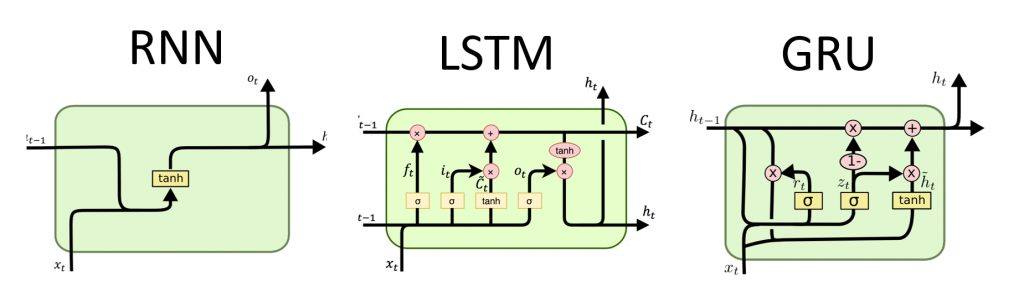

<sub>이미지 출처 : http://dprogrammer.org/rnn-lstm-gru</sub>

## **3.5 Attention**

**Sequence-to-Sequence**

 * Sequence-to-sequence(Seq2Seq)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 모델

 * 예를 들어 밑에 이미지처럼 한국어 도메인을 가지는 문장을 입력해 외국어 도메인에 해당하는 문장을 얻을 수 있음

 * Seq2Seq는 다른 특별한 기술을 이용하는 것이 아닌 지금까지 배운 RNN 기술들을 조합해 만들며, encoder와 decoder로 구성


<img src="https://wikidocs.net/images/page/24996/seq2seq%EB%AA%A8%EB%8D%B811.PNG" width="400">

<sub>이미지 출처 : https://wikidocs.net/24996</sub>

**인코더(Encoder)**
 
 * encoder는 입력 문장을 받는 여러 개의 RNN cell

 * 입력은 단어 토큰화로 단어 단위로 쪼개지고, 이는 각 시점의 encoder 입력이 됨

 * encoder는 모든 단어를 입력받고 마지막 시점의 은닉 상태를 decoder RNN cell의 첫번째 은닉 상태로 넘겨주며, 이를 **컨텍스트 벡터(context vector)**라고 함
 
 * encoder는 입력 시퀀스를 컨텍스트 벡터라는 고정 길이 벡터로 압축하고자 함

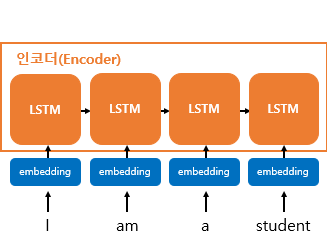

<sub>이미지 출처 : https://www.youtube.com/watch?v=aUsGQaqYYBk&t=3s</sub>

**디코더(Decoder)**

* decoder는 encoder와 마찬가지로 여러 개의 RNN cell로 이루어짐

* decoder의 처음 입력은 시작을 나타내는 토큰을 입력하며, 이 토큰 다음에 등장할 단어를 예측

* 처음 셀에서 단어를 예측한 결과는 다시 다음 시점의 decoder 입력으로 사용

* 위 과정을 반복해, 끝을 나타내는 토큰이 예측될 때까지 반복

* 요약하자면 decoder는 encoder에서 넘겨받은 컨텍스트 벡터를 활용해 시퀀스를 만들어 냄

* sos로 시작을 알리며 eos가 나올때까지 반복

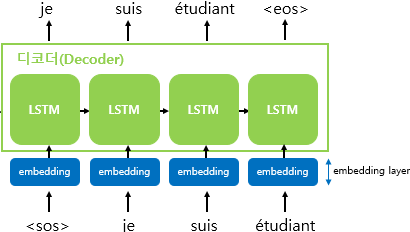

<sub>이미지 출처 : https://www.youtube.com/watch?v=aUsGQaqYYBk&t=3s</sub>

**교사 강요(Teacher Forcing)**

* 정의 : Seq2Seq 에서 Decoder가 이전 Time-step 에서 예측한 값이 아닌 실제 정답(Target)을 다음 Time-step Decoder에 입력하는 기법

* seq2seq 모델을 잘 살펴보면 디코더의 입력이 필요하지 않음을 알 수 있음

* 예측이 잘못됐을 경우, 잘못된 예측이 다음 시점으로 입력돼 연쇄적으로 잘못된 예측을 함

* 이를 해결하기 위해 디코더의 다음 시점의 입력으로 이전 시점의 출력이 아닌, 정답을 주어 이를 방지함

* 장점
  * 실제 정답을 입력하기 때문에 Decoder가 엉뚱한 토큰을 예측하더라도 학습에 안정성 증가
* 단점
 * 실제 학습과 추론 코드를 각각 구성해야 함
 * 학습과 추론 사이의 괴리가 존재




### **3.5.1 Attention**

<img src='https://image.canon-ci.co.kr/pds/editor/images/000063/20180511120225570_G2RKUJ2A.jpg' width=400>

<sub>이미지 출처 : https://kr.canon/magazine/detail/4768</sub>

* seq2seq(rnn기반) 모델의 문제점

  * 하나의 고정 길이 벡터에 모든 정보를 압축해 정보 손실 발생(장기 의존성/ Long-term dependency)

  * RNN의 문제점인 기울기 소실 문제가 똑같이 발생

* seq2seq 문제 개선을 위해 Attention Mechanism이 탄생

* Decoder에서 출력 단어를 예측하는 시점마다 Encoder에서의 전체 입력 문장을 다시 한 번 참고하는 것

* 해당 단어와 연관이 있는 단어를 좀 더 집중(Attention)하여 보게 됨

* 위 이미지 처럼 꽃 하나에 포커싱하여 집중하는 것

<img src="https://user-images.githubusercontent.com/45377884/86040995-f27b4800-ba7f-11ea-8ca1-67b2517573eb.gif" alt="seq2seq_6" width="1000" />

 <center>seq2seq 모델

<img src="https://user-images.githubusercontent.com/45377884/86040873-b942d800-ba7f-11ea-9f59-ee23923f777e.gif" alt="seq2seq_7" width="1000" />

<center> seq2seq 모델에 어텐션 적용

디코더에서 Attention이 동작하는 방법